# Sensitivity of hydrological length scale *cgs*

## Relative errors mean annual fluxes

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from scipy.misc import imread
import matplotlib.cbook as cbook

<Figure size 1280x400 with 0 Axes>

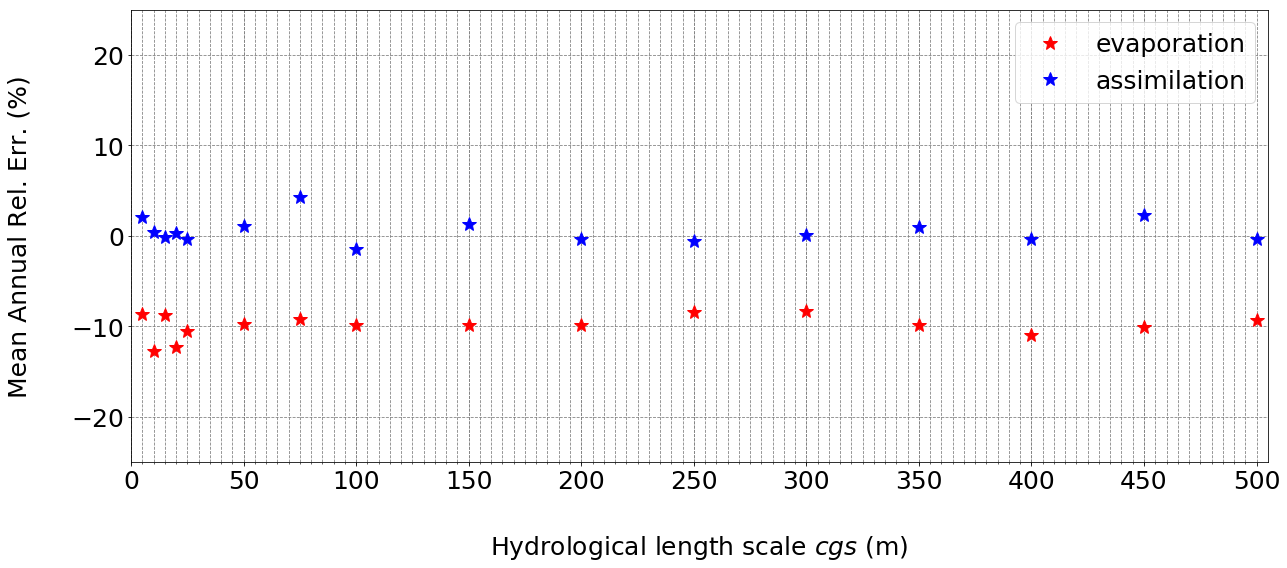

In [3]:
#load data
vals = np.arange(5, 505, 5)
#labels = ''.join(str(e) for e in vals)
#labels = map(str, np.round(vals,2) ) 
labels = map("{:.0f}".format, vals)
labels = list(labels)

#format(value, '.2f')

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=1, figsize=(18, 8), sharex=True, sharey=True)   

i = 0
skipped = 0


loc = 1
#loop over all cpcff-values for the free-draining case
for label in labels:   

    try:
        ebest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/sens_cgs/HS_" + 
          label + "/sce_stats_best/evap_beststats.txt") #mm/d

        assbest_stats = np.genfromtxt("../../data/VOM_output/additional_analyses/sens_cgs/HS_" + 
          label + "/sce_stats_best/ass_beststats.txt") #mm/d       

        if(i == 0):
            box1 = ax.plot(vals[i], ebest_stats[1]*100, '*r', markersize=15, label="evaporation" ) 
            ax.plot(vals[i], assbest_stats[1]*100, '*b', markersize=15, label="assimilation" ) 
        else:
            box1 = ax.plot(vals[i], ebest_stats[1]*100, '*r', markersize=15 ) 
            ax.plot(vals[i], assbest_stats[1]*100, '*b', markersize=15 ) 

    except IOError:
        skipped = skipped + 1 
        #print("../../data/VOM_output/additional_analyses/sens_cgs/HS_" + 
        #  label + "/sce_stats_best/ass_beststats.txt')")
    i = i + 1


ax.set_ylim([-25, 25])    
ax.set_xlim([0, 505])    
ax.grid(b=True, which='both', color='grey', axis="both", linestyle='--')

ax.set_xticks( np.arange(0,550, 50)  )  
ax.set_xticks( np.arange(0,500, 5), minor=True )  

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
    
plt.xlabel(r"Hydrological length scale $cgs$ (m)", size = 25, labelpad=40)
plt.ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)

plt.legend(prop={'size': 25})
plt.tight_layout()
plt.show()
    

**Figure S5.1.** Relative error for the mean annual fluxes with evaporation in red and assimilation in blue. The different parameterizations of the length scale cgs do not lead to large differences for the (relative error of) mean annual values of assimilation and evaporation.

## Timeseries of evaporation


In [4]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_cgs/HS_2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_5/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_10/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_15/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_20/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_25/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_50/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_75/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_100/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_150/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_200/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_250/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_300/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_350/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_400/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_450/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_500/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" --plot_cbar True \
--cbar_max 500 --cbar_min 2 --cblabel "cgs (m)" --labels VOM VOM2 \
--title "HowardSprings" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt

OSError: ../../data/VOM_output/additional_analyses/sens_cgs/HS_2/sce_best/results_daily.txt not found.

**Figure S5.2.** Timeseries of total evaporation for Howard Springs with in blue the fluxtower observations and the VOM-results for different values of the hydrological lenghtscale (color scale). The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The timeseries of evaporation do not show large differences when only the length scale parameter is adjusted.

## Timeseries of assimilation


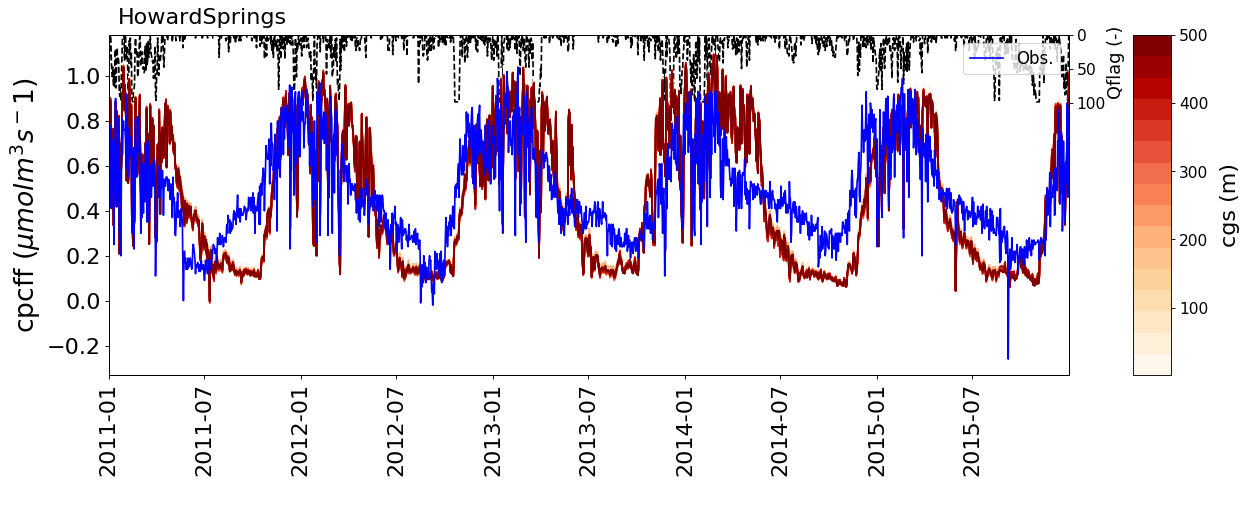

In [5]:

#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_cgs/HS_2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_5/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_10/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_15/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_20/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_25/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_50/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_75/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_100/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_150/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_200/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_250/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_300/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_400/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_450/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_500/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "cpcff ($\mu mol m^3 s^{-1})$" \
--plot_cbar True --cbar_max 500 --cbar_min 2 --cblabel "cgs (m)" --labels VOM VOM2 \
--title "HowardSprings" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt


**Figure S5.3.** Timeseries of total assimilation for Howard Springs with in blue the fluxtower observations and the VOM-results for different values of the hydrological lenghtscale (color scale). The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The timeseries of assimilation do not show large differences when only the length scale parameter is adjusted, similar as for evaporation (Figure S5.2) 

## Timeseries water tables

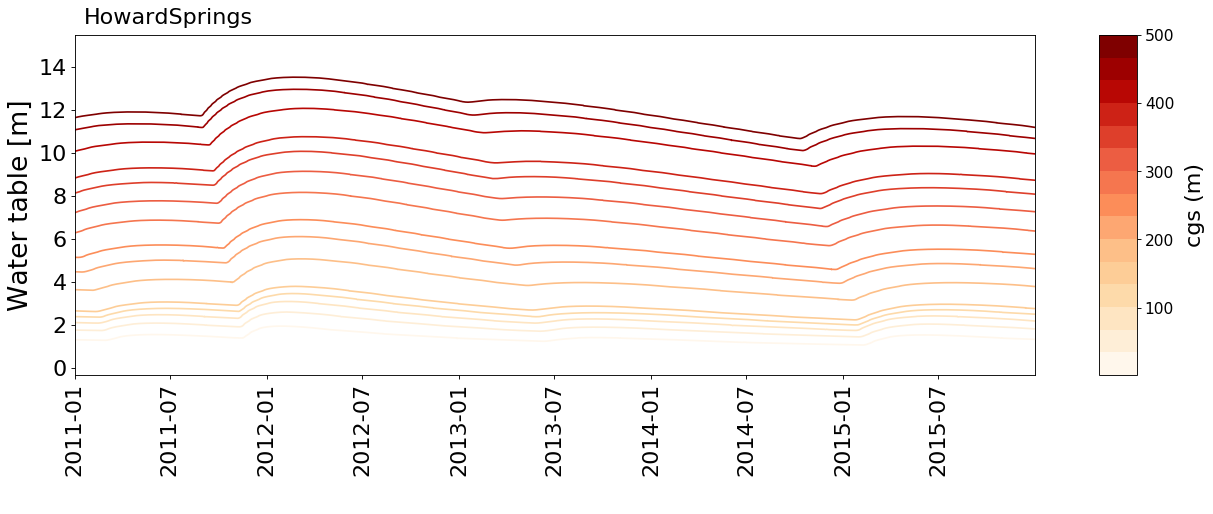

In [6]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/additional_analyses/sens_cgs/HS_5/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_10/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_15/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_20/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_25/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_50/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_75/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_100/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_150/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_200/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_250/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_300/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_400/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_450/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_cgs/HS_500/sce_best/results_daily.txt \
-v zw -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Water table [m]" --plot_cbar \
True --cbar_max 500 --cbar_min 2 --cblabel "cgs (m)" --labels VOM VOM2 \
--title "HowardSprings"


**Figure S5.4.** Timeseries of groundwater tables for Howard Springs for different values of the hydrological lenghtscale (color scale). Water tables go up for increasing cgs-values, but do not reach the surface at 48.40m. The sensitivity in the  groundwater is much higher compared to the fluxes.